### Alkalinity

It is worthwhile to briefly discuss the concepts of alkalinity and pH at this point. The alkalinity value reported for water samples is determined from a titration of the water sample with H2SO4 or HCl, and is reported as meq/l or eq/l CO3, meq/l or eq/l HCO3 or meq/l or eq/l CaCO3. Alkalinity is actually equal to total HCO3- +CO32- + any other weak acids that are negatively charged at natural water pH values of 7 to 10 (usually boron and organic acids). This value is calculated by measuring the number of equivalents of acid needed to change the water sample (of known volume) from its starting pH to a pH of 4. So eq/l of H+ used = eq/l of alkalinity in the water. Sometimes this data is further converted to eq/l or mg/l of HCO3 and /or CO3 using the pH of the water and assuming that the ratio of HCO3/CO3 is a function of pH (10-10.3 = CO32- * H+/HCO3-).

It’s probably easier to use PHREEQC to simulate an alkalinity titration to help understand than read complicated explanations. Use the following input file to simulate the alkalinity titration (input file titration 1). The plot shows the change in pH with addition of H2SO4. The pH of the solution does decrease, but there are two flat areas where the buffering effect of the conversion of 1) CO3-2 to HCO3- and 2) HCO3- to H2CO3 (CO2) in the standard PHREEQC database consume protons supplied by the sulfuric acid. This simple simulation shows the concept of pH buffers as well as the alkalinity titration.

```
SOLUTION 1 Simplified Mt. Edna Solicchiata
units mg/l
pH 9.90
pe -0.2
density 1.00
temp 17.2
C(4) 1180 as HCO3
Ca 28.1
Cl 238 charge
Fe 0.150
K 30.1
Mg 214
Mn 0.0277
Na 250
S(6) 20
Si 79.4 as SiO2
Sr 0.673
REACTION
H2SO4
0.02 moles in 50 steps
SELECTED_OUTPUT
-file titration1.csv
-reaction true
END
```

In [ ]:
import subprocess

# Use of the reaction command. Example of calcite dissolution in water 

input_file_content = """
SOLUTION 1 Simplified Mt. Edna Solicchiata
units mg/l
pH 9.90
pe -0.2
density 1.00
temp 17.2
C(4) 1180 as HCO3
Ca 28.1
Cl 238 charge
Fe 0.150
K 30.1
Mg 214
Mn 0.0277
Na 250
S(6) 20
Si 79.4 as SiO2
Sr 0.673
REACTION
H2SO4
0.02 moles in 50 steps
SELECTED_OUTPUT
-file titration1.csv
-reaction true
END
"""

# Save the input file
input_file_name = "phreeqc_example8.pqi"
with open(input_file_name, "w") as file:
    file.write(input_file_content)
print(f"PHREEQC input file '{input_file_name}' created successfully.")

# Step 2: Run PHREEQC using subprocess
output_file_name = "phreeqc_example8_out.txt"
database_file = "/srv/data/phreeqc-3.7.3-15968/database/phreeqc.dat"  # Update the path if necessary
phreeqc_executable = "/srv/data/phreeqc-3.7.3-15968/src/phreeqc"  # Use "phreeqc.exe" on Windows, or the full path to the executable

# Run PHREEQC
try:
    subprocess.run([phreeqc_executable, input_file_name, output_file_name, database_file], check=True)
    print(f"PHREEQC run completed. Output saved in '{output_file_name}'.")
except subprocess.CalledProcessError as e:
    print(f"PHREEQC execution failed: {e}")    

# Display the contents of the output file, ignoring problematic characters
try:
    with open(output_file_name, "r", encoding="utf-8", errors="ignore") as output_file:
        output_content = output_file.read()
    print("PHREEQC Output:\n")
    print(output_content)
except FileNotFoundError:
    print(f"Output file '{output_file_name}' not found.")

/tmp/ipykernel_70880/4198182922.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data1 = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None, usecols=[6, 8], names=['pH', 'reaction'])


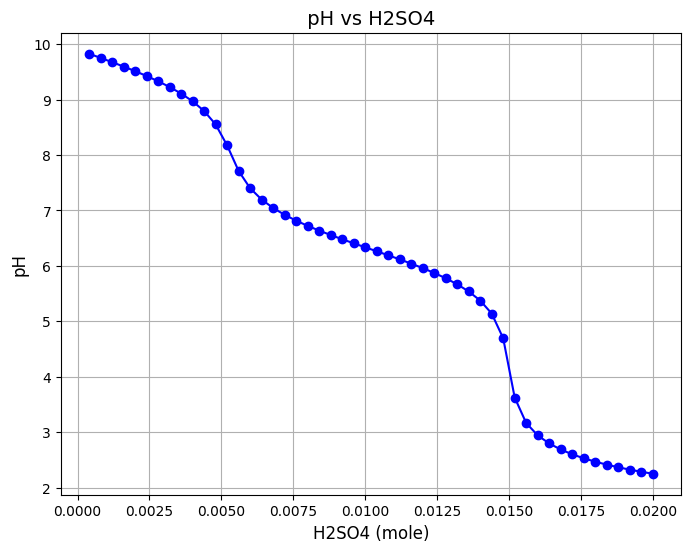

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the txt file, skipping the first row
file_name = 'titration1.csv'  # Path to the file
data1 = pd.read_csv(file_name, delim_whitespace=True, skiprows=2, header=None, usecols=[6, 8], names=['pH', 'reaction'])

# Extract temperature and pH values
temp1 = data1['pH']
pH1 = data1['reaction']


# Plotting temperature vs pH
plt.figure(figsize=(8, 6))
plt.plot(pH1, temp1, marker='o', linestyle='-', color='b')
plt.title(' pH vs H2SO4 ', fontsize=14)
plt.xlabel('H2SO4 (mole)', fontsize=12)
plt.ylabel('pH', fontsize=12)
plt.grid(True)
plt.show()